In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [13]:
basedir = os.path.abspath('')
train = os.path.join(basedir, "Data/cleaned/data_train.csv")
test = os.path.join(basedir, "Data/cleaned/data_test.csv")
data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

In [3]:
print(data_train.shape)
data_train.head(10)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
6,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
7,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
8,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
9,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1


In [11]:
data_train["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [5]:
print(data_test.shape)
data_test.head(10)

(16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
5,34,4,198693,0,6,4,8,1,4,1,0,0,30,39,0
6,29,0,227026,11,9,4,0,4,2,1,0,0,40,39,0
7,63,6,104626,14,15,2,10,0,4,1,3103,0,32,39,1
8,24,4,369667,15,10,4,8,4,4,0,0,0,40,39,0
9,55,4,104996,5,4,2,3,0,4,1,0,0,10,39,0


In [10]:
data_test["income"].value_counts()

0    12435
1     3846
Name: income, dtype: int64

In [7]:
data_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### Upsampling

In [99]:
data_train_def = data_train.loc[data_train["income"]==1]
data_train = pd.concat([data_train, data_train_def])

In [24]:
X_train = data_train.drop("income", axis=1)
X_test = data_test.drop("income", axis=1)
y_train = data_train["income"]
y_test = data_test["income"]

In [111]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [105]:
sm = SMOTE(random_state=42, sampling_strategy=0.5)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [25]:
#over = RandomOverSampler(sampling_strategy = 0.5, random_state = 42)
#X_train, y_train = over.fit_resample(X_train, y_train)
under = RandomUnderSampler(sampling_strategy = 0.5, random_state = 42)
X_train, y_train = under.fit_resample(X_train, y_train)

In [26]:
y_train.value_counts()

0    15682
1     7841
Name: income, dtype: int64

In [89]:
y_train.value_counts()

0    24720
1    15682
Name: income, dtype: int64

In [27]:
clf_forest=RandomForestClassifier(random_state=42)

clf_forest.fit(X_train, y_train)

importance_forest = clf_forest.feature_importances_
y_pred = clf_forest.predict(X_test)



In [8]:
print(clf_forest.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     12435
           1       0.66      0.71      0.68      3846

    accuracy                           0.85     16281
   macro avg       0.78      0.80      0.79     16281
weighted avg       0.85      0.85      0.85     16281



Feature: 0 age, Score: 0.14482804017219558 
Feature: 1 workclass, Score: 0.035776789235096196 
Feature: 2 fnlwgt, Score: 0.1407792657591918 
Feature: 3 education, Score: 0.03566003954247571 
Feature: 4 education-num, Score: 0.09462322315686647 
Feature: 5 marital-status, Score: 0.0966183437517335 
Feature: 6 occupation, Score: 0.0633875321436317 
Feature: 7 relationship, Score: 0.1328355087813059 
Feature: 8 race, Score: 0.013543525802510826 
Feature: 9 sex, Score: 0.015713802591304588 
Feature: 10 capital-gain, Score: 0.09714461697516144 
Feature: 11 capital-loss, Score: 0.03013030729333404 
Feature: 12 hours-per-week, Score: 0.08265337127315578 
Feature: 13 native-country, Score: 0.016305633522036324 


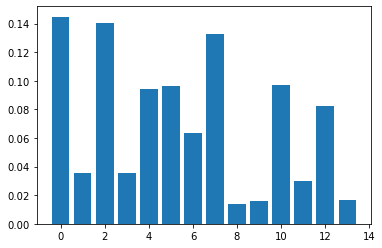

In [68]:
for i,v in enumerate(importance_forest):
    print('Feature: {} {}, Score: {} '.format(i,data_train.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_forest))], importance_forest)
plt.show()

#### Grid search

In [80]:
clf_forest=RandomForestClassifier(random_state=42)

params= {
    'n_estimators' : np.arange(300,600,50).tolist(),
    'max_depth' : np.arange(10,50,20).tolist(),
    'class_weight' : ["balanced", "balanced_subsample", None]
    'criterion' : ["gini", "entropy"],
    'max_features' : np.arange(0.1,1,0.1).tolist()
    
}

In [81]:
# Setting up the grid search that will test every combination of parameters
gridsearch = GridSearchCV(estimator = clf_forest,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 10, # Use 5 folds
                        verbose = 1,
                        random_state=42,
                        n_jobs = -1 #Use all but one CPU core
                        )

# As we are doing cross-validation on the training set, the testing set X_test is untouched
result = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 18.4min finished


In [114]:
print("The best parameters are :", result.best_params_)
print("The best accuracy is {:.2f}%:".format(result.best_score_ * 100))

The best parameters are : {'criterion': 'gini', 'max_features': 0.30000000000000004, 'n_estimators': 550}
The best accuracy is 93.33%:


In [116]:
rf = result.best_estimator_
score = rf.score(X_train, y_train)
print("The generalization accuracy of the model is {:.2f}%".format(score * 100))

The generalization accuracy of the model is 75.92%


In [123]:
X = pd.concat([data_train, data_test])
X_cv = X.drop("income", axis=1)
Y_cv = X["income"]

In [125]:
clf_forest=RandomForestClassifier(n_estimators=500, random_state=42, max_depth=30, max_features=0.3)
scores_randfor = cross_val_score(clf_forest, X_cv, Y_cv, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_randfor.mean(), scores_randfor.std()))

0.86 accuracy with a standard deviation of 0.00
